In [184]:
import numpy as np
import pandas as pd

In [185]:
cctv_seoul = pd.read_excel('data/cctv_seoul.xlsx')

In [229]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [232]:
pop_seoul = pd.read_csv('data/population_seoul.txt', sep='\t', header=2, thousands=",")

In [233]:
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394
2,2019.3/4,중구,62593,136663,67030,69633,126409,62161,64248,10254,4869,5385,2.02,23025
3,2019.3/4,용산구,109911,244989,119499,125490,228830,110478,118352,16159,9021,7138,2.08,38531
4,2019.3/4,성동구,136466,311290,152134,159156,303158,148510,154648,8132,3624,4508,2.22,43662


In [234]:
# pop_seoul = pop_seoul.rename(columns={pop_seoul.columns[1]: '구별'})
pop_seoul.rename(columns={pop_seoul.columns[1]: '구별'}, inplace=True)
pop_seoul.head(2)

,기간,구별,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394


In [235]:
pop_seoul.head(2)

,기간,구별,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394


In [236]:
columnnames = list(cctv_seoul.columns)
columnnames[0] = '구별'
cctv_seoul.columns = columnnames
cctv_seoul.head(2)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385


In [237]:
cctv_seoul['구별'][1]

'강동구'

In [238]:
pop_seoul['구별'][1]

'종로구'

In [239]:
def delete_space(x):
    new_str = ""
    
    for i in x:
        if not i == ' ':
            new_str +=i
            
    return new_str


In [240]:
cctv_seoul['구별'].apply(lambda x:x.replace(" ", ""))
cctv_seoul['구별'].apply(delete_space)
cctv_seoul['구별'] = \
    cctv_seoul['구별'].apply(lambda x: "".join(x.split(" ")))

In [241]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [242]:
pop_seoul = pop_seoul[["구별", "계", "계.1", "계.2", "65세이상고령자"]]
pop_seoul.head()

,구별,계,계.1,계.2,65세이상고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [243]:
pop_columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul.columns = pop_columns
pop_seoul.head(2)

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394


In [244]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
구별          25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [245]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [248]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
구별     26 non-null object
인구수    26 non-null int64
한국인    26 non-null int64
외국인    26 non-null int64
고령자    26 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [250]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
구별          25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [254]:
cctv_seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [265]:
cctv_seoul['최근증가율'] = cctv_seoul.loc[:, "2015년": "2018년"].sum(axis=1)/ \
cctv_seoul.loc[:, "2011년 이전" : "2014년"].sum(axis=1) * 100

cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,68.085106
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,96.981500
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,104.052098
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,98.459846
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,129.585207


In [271]:
pop_seoul = pop_seoul.drop([0])
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662
5,광진구,368337,352692,15645,47347


In [283]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [290]:
cctv_seoul.fillna(0, inplace=True)

In [297]:
data_result = cctv_seoul.merge(pop_seoul, on="구별")

In [302]:
data_result.set_index("구별", inplace=True)

In [304]:
data_result.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,534.040000,113.920000,178.680000,249.920000,226.880000,267.360000,299.440000,349.480000,94.661939,401037.080000,389615.920000,11421.160000,58725.840000,3.347607,14.924472
std,967.646523,494.321798,85.577411,140.485385,285.271935,144.643908,160.365956,216.219618,218.601067,40.578968,128038.832784,129798.481698,8432.515366,16360.578539,2.656443,1.604396
min,858.000000,0.000000,0.000000,0.000000,21.000000,59.000000,21.000000,1.000000,9.000000,17.599131,136663.000000,126409.000000,2314.000000,23025.000000,0.685439,12.575949
25%,1586.000000,197.000000,66.000000,88.000000,87.000000,130.000000,155.000000,136.000000,195.000000,76.378539,324089.000000,314090.000000,4547.000000,51708.000000,0.999484,13.817306
50%,1935.000000,470.000000,99.000000,141.000000,134.000000,180.000000,254.000000,273.000000,328.000000,92.346425,403776.000000,397618.000000,10254.000000,59808.000000,2.757898,14.766852
75%,2775.000000,772.000000,155.000000,228.000000,241.000000,268.000000,326.000000,372.000000,448.000000,109.316155,463931.000000,459849.000000,15645.000000,70029.000000,4.735842,15.961573
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000,184.419714,684338.000000,677489.000000,34076.000000,86062.000000,8.466550,18.814943


### matplotlib

In [307]:
import matplotlib.pyplot as plt

In [308]:
%matplotlib inline

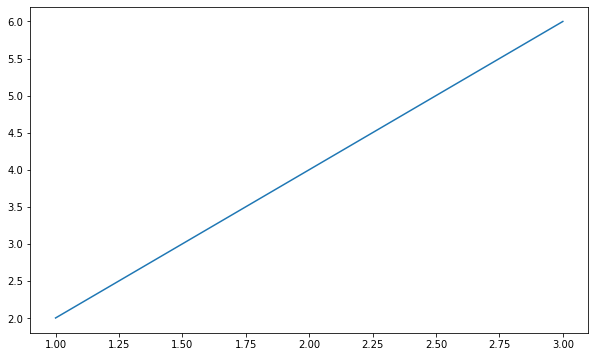

In [314]:
plt.figure(figsize= (10, 6))

plt.plot([1, 2, 3], [2,4,6])
plt.show()

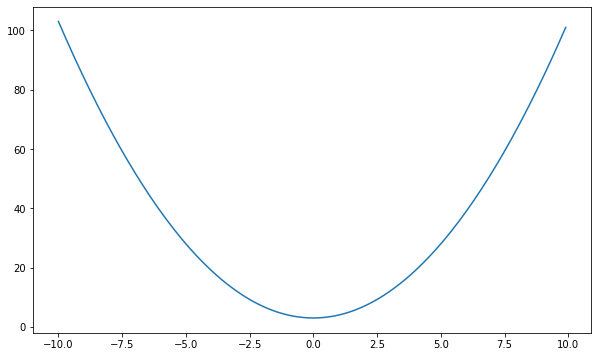

In [316]:
x = np.arange(-10, 10, .1)
y = x**2 + 3

plt.figure(figsize= (10,6))
plt.plot(x, y)
plt.show()

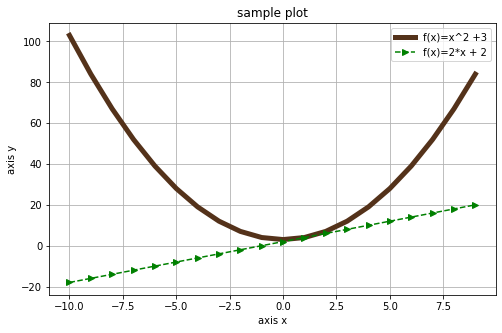

In [335]:
x = np.arange(-10, 10, 1)
y = x**2 + 3

y2 = 2*x + 2

plt.figure(figsize= (8,5))
plt.grid()

plt.plot(x, y, label="f(x)=x^2 +3", color="#54321A", lw=5)
plt.plot(x, y2, label="f(x)=2*x + 2", color = "green", ls="dashed", marker=">")

plt.legend()

plt.title("sample plot")

plt.xlabel("axis x")
plt.ylabel('axis y')
plt.show()

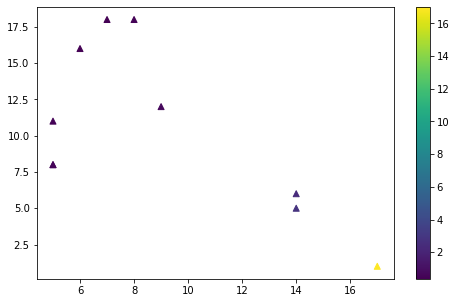

In [348]:
plt.figure(figsize= (8, 5))
x = np.random.randint(1,20, size=(10,))
y = np.random.randint(1, 20, size=(10,))

plt.scatter(x,y, marker='^', c=x/y)
plt.colorbar()

plt.show()

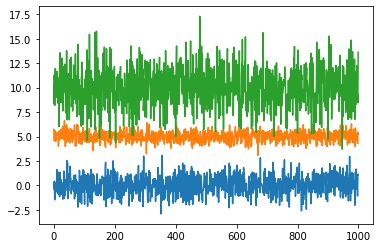

In [349]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')

plt.show()

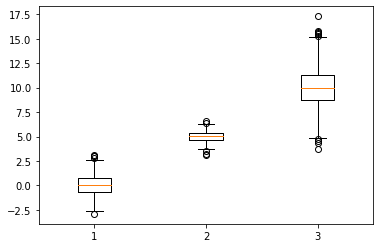

In [351]:
plt.boxplot((s1, s2, s3))
plt.show()

In [352]:
data_result.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,534.040000,113.920000,178.680000,249.920000,226.880000,267.360000,299.440000,349.480000,94.661939,401037.080000,389615.920000,11421.160000,58725.840000,3.347607,14.924472
std,967.646523,494.321798,85.577411,140.485385,285.271935,144.643908,160.365956,216.219618,218.601067,40.578968,128038.832784,129798.481698,8432.515366,16360.578539,2.656443,1.604396
min,858.000000,0.000000,0.000000,0.000000,21.000000,59.000000,21.000000,1.000000,9.000000,17.599131,136663.000000,126409.000000,2314.000000,23025.000000,0.685439,12.575949
25%,1586.000000,197.000000,66.000000,88.000000,87.000000,130.000000,155.000000,136.000000,195.000000,76.378539,324089.000000,314090.000000,4547.000000,51708.000000,0.999484,13.817306
50%,1935.000000,470.000000,99.000000,141.000000,134.000000,180.000000,254.000000,273.000000,328.000000,92.346425,403776.000000,397618.000000,10254.000000,59808.000000,2.757898,14.766852
75%,2775.000000,772.000000,155.000000,228.000000,241.000000,268.000000,326.000000,372.000000,448.000000,109.316155,463931.000000,459849.000000,15645.000000,70029.000000,4.735842,15.961573
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000,184.419714,684338.000000,677489.000000,34076.000000,86062.000000,8.466550,18.814943


<BarContainer object of 10 artists>

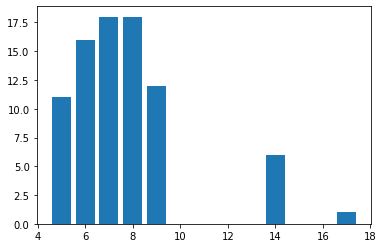

In [353]:
plt.bar(x, y)

<BarContainer object of 10 artists>

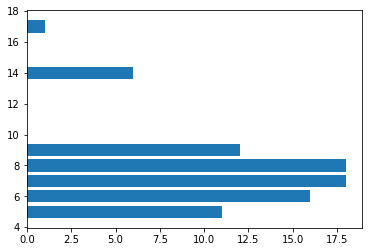

In [354]:
plt.barh(x, y)

In [356]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("OS not used")

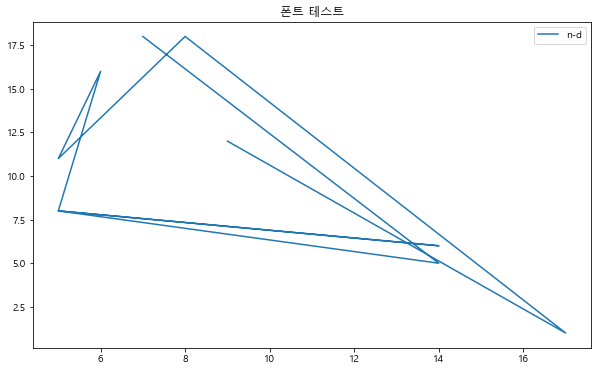

In [363]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 'n-d')
plt.title("폰트 테스트")
plt.legend()
plt.show()

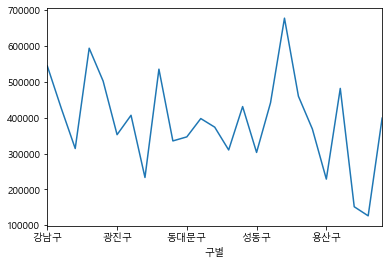

In [361]:
data_result['한국인'].plot()

In [368]:
x.sort()
x

array([ 5,  5,  5,  6,  7,  8,  9, 14, 14, 17])

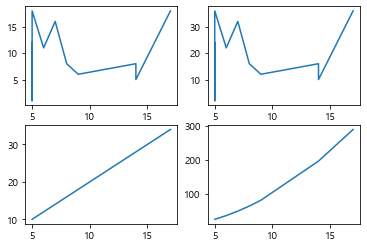

In [369]:
plt.subplot(2,2,1)
plt.plot(x, y)
plt.subplot(2,2,2)
plt.plot(x, 2*y)
plt.subplot(2,2,3)
plt.plot(x, 2*x)
plt.subplot(2,2,4)
plt.plot(x, x**2)


## 1-8. CCTV 현황그래프 분석 